In [1]:
%run packages.py

2025-02-12 15:30:44.149660: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from data_import_enginnering import DataImportEnginnering
from metric_selection import Pair_Selection
from data_visualization import Data_Visualization
import importlib

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


# 1. DATA

## 1.1. Importation of data into a dictionary

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
Stock_list = pd.DataFrame(tables[0])
Stock_list.drop(['Security','GICS Sub-Industry','Headquarters Location','CIK','Founded'],axis = 1, inplace=True)
Stock_list['Date added'] = pd.to_datetime(Stock_list['Date added'])
Stock_list = Stock_list[( Stock_list['Date added'] < '2019-12-31') & (Stock_list['Date added']>'2015-01-01')][['Symbol','GICS Sector']]

In [4]:
stock_list = list(Stock_list['Symbol'].unique())
Stock_list_sector = Stock_list.groupby('GICS Sector')['Symbol'].unique().to_dict()
sector_list = list(Stock_list_sector.keys())
pairs = {k:[tuple(sorted((i,j))) for i in Stock_list_sector[k] for j in Stock_list_sector[k] if j!=i] for k in sector_list}
pairs = {k :sorted(list(set(pairs[k]))) for k in sector_list}

In [5]:
start_date = '2018-01-01'
end_date = '2019-12-31'
period = '1d'
colone = ['Close']


In [6]:
Enginner = DataImportEnginnering(stock_list,start_date=start_date,end_date=end_date,period=period,colone=colone)

In [7]:
raw_data = Enginner.RawData()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## 1.2. Normalisation of data

In [8]:
raw_data_normalized = {}
for key, value in raw_data.items():
    raw_data_normalized[key] = Enginner.normalize(value)

raw_data_normalized

{'AOS': Price          Close
 Ticker           AOS
 Date                
 2018-01-02  0.761193
 2018-01-03  0.775196
 2018-01-04  0.786171
 2018-01-05  0.816448
 2018-01-08  0.827802
 ...              ...
 2019-12-23  0.275176
 2019-12-24  0.289248
 2019-12-26  0.298629
 2019-12-27  0.301365
 2019-12-30  0.291984
 
 [502 rows x 1 columns],
 'AMD': Price          Close
 Ticker           AMD
 Date                
 2018-01-02  0.039084
 2018-01-03  0.054447
 2018-01-04  0.069811
 2018-01-05  0.063342
 2018-01-08  0.074124
 ...              ...
 2019-12-23  0.968464
 2019-12-24  0.997574
 2019-12-26  1.000000
 2019-12-27  0.987871
 2019-12-30  0.970081
 
 [502 rows x 1 columns],
 'ALB': Price          Close
 Ticker           ALB
 Date                
 2018-01-02  0.922865
 2018-01-03  0.926253
 2018-01-04  0.905797
 2018-01-05  0.925341
 2018-01-08  1.000000
 ...              ...
 2019-12-23  0.185756
 2019-12-24  0.184273
 2019-12-26  0.186565
 2019-12-27  0.180093
 2019-12-30  0.179014
 

In [9]:
dataframe_normalized = Enginner.Dictionnary_to_Dataframe(raw_data_normalized)
raw_dataframe = Enginner.Dictionnary_to_Dataframe(raw_data)

In [10]:
dataframe_normalized= dataframe_normalized.stack(future_stack=True).stack(future_stack=True).droplevel(level =2).unstack()
raw_dataframe= raw_dataframe.stack(future_stack=True).stack(future_stack=True).droplevel(level =2).unstack()

#### raw_data = first dictionnary with non normalised data for each ticker
#### raw_data_normalized = dictionnary with normalised data
#### raw_dataframe = raw_data into dataframe
#### dataframe_normalized = raw_data_normalized into dataframe

# 2. Pair selection

## 2.1. With Euclidean Distance

In [11]:
Metric = Pair_Selection(dataframe_normalized,number_of_pair=2,stock_list_sector=Stock_list_sector,sector_list=sector_list,sector_neutral = True)

In [12]:
distance = Metric.compute_euclidian_distance()

In [13]:
selected_pairs = Metric.paire_selection(distance,number_of_pair=2,stock_list_sector=Stock_list_sector,sector_list=sector_list,pairs=pairs)

In [14]:
selected_pairs['Energy'] = [selected_pairs['Energy'][0]]
selected_pairs

{'Communication Services': [('FOX', 'FOXA'), ('TMUS', 'LYV')],
 'Consumer Discretionary': [('MGM', 'LKQ'), ('NVR', 'HLT')],
 'Consumer Staples': [('LW', 'CHD'), ('LW', 'KHC')],
 'Energy': [('FANG', 'BKR')],
 'Financials': [('MSCI', 'GPN'), ('GPN', 'CPAY')],
 'Health Care': [('IQV', 'COO'), ('STE', 'IQV')],
 'Industrials': [('TDG', 'CPRT'), ('LDOS', 'CPRT')],
 'Information Technology': [('CDW', 'ANSS'), ('SNPS', 'CDNS')],
 'Materials': [('PKG', 'DOW'), ('DD', 'ALB')],
 'Real Estate': [('UDR', 'O'), ('REG', 'FRT')],
 'Utilities': [('AWK', 'LNT'), ('SRE', 'AWK')]}

In [15]:
data1 = dataframe_normalized.copy()
data2 = raw_dataframe.copy()
# The goal would be to stock every small data frame in a dictionnay to help doing the steps for the reste 
dataframes_dictionnary_norm = {}
dataframes_dictionnary_raw ={}
for sector in sector_list: 
    for value in selected_pairs[sector]:
        
        dataframes_dictionnary_norm[value] = data1[list(value)].copy()
        dataframes_dictionnary_raw[value] = data2[list(value)].copy()

#### dataframes_dictionnary_norm = dictionnary containing normalized data for each of the selected pairs

#### dataframes_dictionnary_raw = dictionnary containing raw data for each of the selected pairs

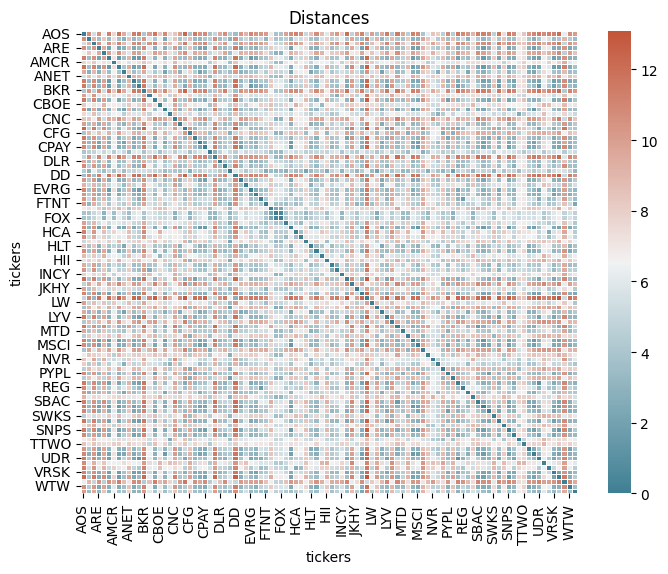

In [16]:
plots = Data_Visualization()
plots.metric(distance, "Distances","tickers","tickers")

In [17]:
plots.pair_historic(dataframes_dictionnary_norm)

## 2.2 Cointegration

In [18]:
pairs_sector_list = [tuple_item for sublist in pairs.values() for tuple_item in sublist]

In [19]:
selected_pairs_2 = Metric.paire_selection_2(pairs_sector_list, p=0.01)
selected_pairs_2

[('LYV', 'TMUS'),
 ('GPN', 'SYF'),
 ('COO', 'IQV'),
 ('CE', 'PKG'),
 ('DLR', 'REG'),
 ('FRT', 'UDR')]

In [20]:
data1 = dataframe_normalized.copy()
data2 = raw_dataframe.copy()
# The goal would be to stock every small data frame in a dictionnay to help doing the steps for the reste 
dataframes_dictionnary_norm_cointegration = {}
dataframes_dictionnary_raw_cointegration ={} 
for pair in selected_pairs_2:
        
    dataframes_dictionnary_norm_cointegration[pair] = data1[list(pair)].copy()
    dataframes_dictionnary_raw_cointegration[pair] = data2[list(pair)].copy()

In [21]:
plots.pair_historic(dataframes_dictionnary_norm_cointegration)

# 3. Computation of spreads

In [22]:
from Spread import Spread


In [23]:
data_viz = Data_Visualization()

In [24]:
for key,values in dataframes_dictionnary_norm.items():

    values.loc[:,'Delta'] = values[key[0]] - values[key[1]]
    values.loc[:,'Delta_norm'] = (values['Delta'] - values['Delta'].mean()) / values['Delta'].std()
    values.drop(['Delta'], axis = 1, inplace=True )

dataframes_dictionnary_norm

{('FOX',
  'FOXA'): Ticker           FOX      FOXA  Delta_norm
 Date                                      
 2018-01-02       NaN       NaN         NaN
 2018-01-03       NaN       NaN         NaN
 2018-01-04       NaN       NaN         NaN
 2018-01-05       NaN       NaN         NaN
 2018-01-08       NaN       NaN         NaN
 ...              ...       ...         ...
 2019-12-23  0.631740  0.666871   -0.879884
 2019-12-24  0.619287  0.652901   -0.828298
 2019-12-26  0.648024  0.677233   -0.678420
 2019-12-27  0.640840  0.662815   -0.432352
 2019-12-30  0.613540  0.633076   -0.349391
 
 [502 rows x 3 columns],
 ('TMUS',
  'LYV'): Ticker          TMUS       LYV  Delta_norm
 Date                                      
 2018-01-02  0.295082  0.163553    1.706946
 2018-01-03  0.280084  0.159762    1.602154
 2018-01-04  0.258807  0.153263    1.463975
 2018-01-05  0.314615  0.181695    1.719947
 2018-01-08  0.332054  0.174384    1.951377
 ...              ...       ...         ...
 2019-12-23

In [25]:
data_viz.spread_plot(dataframes_dictionnary_norm)

# 4. Signal creation

In [26]:
from portfolio import Signaux

In [27]:
"""data = np.array(dataframes_dictionnary_norm[('FOX','FOXA')]['Delta_norm'])
signaux = Signaux(data, 2)
signaux.entry_points_up()"""
for key,value in dataframes_dictionnary_norm.items():
    signaux = Signaux(value.copy(),2)
    value['trading_signals'] = signaux.trading_signals('Delta_norm')
    value['portfolio_units'] = value['trading_signals'].cumsum()

In [28]:
for key,value in dataframes_dictionnary_norm.items():
    print(key)
    print(value)

('FOX', 'FOXA')
Ticker           FOX      FOXA  Delta_norm  trading_signals  portfolio_units
Date                                                                        
2018-01-02       NaN       NaN         NaN                0                0
2018-01-03       NaN       NaN         NaN                0                0
2018-01-04       NaN       NaN         NaN                0                0
2018-01-05       NaN       NaN         NaN                0                0
2018-01-08       NaN       NaN         NaN                0                0
...              ...       ...         ...              ...              ...
2019-12-23  0.631740  0.666871   -0.879884                0               -1
2019-12-24  0.619287  0.652901   -0.828298                0               -1
2019-12-26  0.648024  0.677233   -0.678420                0               -1
2019-12-27  0.640840  0.662815   -0.432352                0               -1
2019-12-30  0.613540  0.633076   -0.349391                0 

In [29]:
data_viz.Entry_trading_points(dataframes_dictionnary_norm)

In [30]:
data_viz.portfolio_units(dataframes_dictionnary_norm)

# 5. Portfolio composition

## Rules :

### - Allocation of 1/n of the capital to each pair, n being the number of pairs

### - Dollar Neutral
Let's say I buy the pair, I buy one unit of asset 1 and sell (price of asset 1/price of asset 2) units of asset 2

### - Stop-loss 
If the level of the spread diverges more than 4 times the threshold, close the trade 

### - Time-stop
try to test for the time of mean reversion and if the trade is not closed by twice this timeframe, close it 

### - If all capital in the pair is lost, drop the pair 

In [ ]:
from portfolio_compo import portfolio
portfolio = portfolio(dataframes_dictionnary_norm,dataframes_dictionnary_raw,1000000,4)
Portfolio = portfolio.portfolio_creation()
Portfolio_sl = portfolio.stop_loss()
Portfolio_ts = portfolio.time_stop()

/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/portfolio_compo.py:22: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/portfolio_compo.py:22: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/julesarzel/Desktop/Pairs trading/Pair_trading-1/portfolio_compo.py:22: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.

In [35]:
'''Capital = 1000000
portfolio = {}
for key,value in dataframes_dictionnary_norm.items():
    portfolio[key] = value
    #portfolio[key] = portfolio[key].drop([key[0],key[1]],axis=1)
    #portfolio[key] = portfolio[key].drop(['Delta_norm','trading_signals'],axis=1)
    #portfolio[key]['Capital'] = Capital/len(dataframes_dictionnary_norm)
    #portfolio[key]['Capital'] = portfolio[key]['Capital']+portfolio[key]['trading_signals']*(-portfolio[key][key[0]]+portfolio[key][key[1]])
    #portfolio[key]['Portfolio'] = portfolio[key]['portfolio_units']*(portfolio[key][key[0]]-portfolio[key][key[1]])'''

"Capital = 1000000\nportfolio = {}\nfor key,value in dataframes_dictionnary_norm.items():\n    portfolio[key] = value\n    #portfolio[key] = portfolio[key].drop([key[0],key[1]],axis=1)\n    #portfolio[key] = portfolio[key].drop(['Delta_norm','trading_signals'],axis=1)\n    #portfolio[key]['Capital'] = Capital/len(dataframes_dictionnary_norm)\n    #portfolio[key]['Capital'] = portfolio[key]['Capital']+portfolio[key]['trading_signals']*(-portfolio[key][key[0]]+portfolio[key][key[1]])\n    #portfolio[key]['Portfolio'] = portfolio[key]['portfolio_units']*(portfolio[key][key[0]]-portfolio[key][key[1]])"

##### Signal = 1 --> je suis long sur le portefeuille donc je achète le premier actif et je vends l'autre 
- Dans mon capital, j'ai donc - actif 1 et + actif 2 
- Dans mon portefeuille, j'ai + actif 1 et - actif 2

In [ ]:
'''window = 60
stop_loss_threshold = 4

for key,value in dataframes_dictionnary_raw.items():
    portfolio[key] = portfolio[key].drop([key[0],key[1]],axis=1)
    portfolio[key][key[0]] = value.loc[:,key[0]]
    portfolio[key][key[1]] = value.loc[:,key[1]]
    portfolio[key]['open_if_odd'] = np.cumsum(np.abs(portfolio[key]['trading_signals']))
    portfolio[key]['dollar_ratio'] = np.where((portfolio[key]['open_if_odd'] % 2 == 1) & (portfolio[key]['trading_signals'] != 0), portfolio[key][key[0]]/portfolio[key][key[1]], None)
    portfolio[key]['dollar_ratio'] = portfolio[key]['dollar_ratio'].ffill()
    portfolio[key]['Capital'] = Capital/len(dataframes_dictionnary_norm) + np.cumsum(portfolio[key]['trading_signals']*(-portfolio[key][key[0]]+portfolio[key]['dollar_ratio']*portfolio[key][key[1]]))
    portfolio[key]['Portfolio'] = portfolio[key]['portfolio_units']*(portfolio[key][key[0]]-portfolio[key]['dollar_ratio']*portfolio[key][key[1]])
    portfolio[key]['spread_mean'] = portfolio[key]['Delta_norm'].rolling(window=window).mean()
    portfolio[key]['spread_std'] = portfolio[key]['Delta_norm'].rolling(window=window).std()
    portfolio[key]['upper_stop'] = portfolio[key]['spread_mean'] + stop_loss_threshold * portfolio[key]['spread_std']
    portfolio[key]['lower_stop'] = portfolio[key]['spread_mean'] - stop_loss_threshold * portfolio[key]['spread_std']
    portfolio[key]['stop_loss'] = np.where(
    ((portfolio[key]['Delta_norm'] > portfolio[key]['upper_stop']) & (portfolio[key]['portfolio_units'] != 0)) |
    ((portfolio[key]['Delta_norm'] < portfolio[key]['lower_stop']) & (portfolio[key]['portfolio_units'] != 0)),
    -portfolio[key]['portfolio_units'],0)
    for i in range(len(portfolio[key]['stop_loss'])):
        if portfolio[key].iloc[i]['stop_loss']!=0 :
            for j in range(i+1,len(portfolio[key]['stop_loss'])):
                if portfolio[key].iloc[j]['trading_signals']!=0 :
                    portfolio[key].iloc[i]['trading_signals'] = portfolio[key].iloc[j]['trading_signals']
                    portfolio[key].iloc[j]['trading_signals'] = 0
    portfolio[key] = portfolio[key].drop(['open_if_odd','spread_mean','spread_std','upper_stop','lower_stop'],axis=1)
'''

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_81310/3089451703.py:10: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_81310/3089451703.py:10: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_81310/3089451703.py:10: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_

In [37]:
p1 = Portfolio[('TMUS', 'LYV')]
p1 

Ticker,Delta_norm,trading_signals,portfolio_units,TMUS,LYV,dollar_ratio,Capital,Portfolio,stop_loss
Date,,,,,,,,,
2018-01-02,1.706946,0,0,62.834690,42.650002,NaN,NaN,NaN,0
2018-01-03,1.602154,0,0,62.412785,42.509998,NaN,NaN,NaN,0
2018-01-04,1.463975,0,0,61.814270,42.270000,NaN,NaN,NaN,0
2018-01-05,1.719947,0,0,63.384155,43.320000,NaN,NaN,NaN,0
2018-01-08,1.951377,0,0,63.874737,43.049999,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2019-12-23,-1.115579,0,-1,75.511520,70.440002,1.061401,47569.312731,-0.746439,0
2019-12-24,-1.041210,0,-1,75.864746,70.610001,1.061401,47569.312731,-0.919228,0
2019-12-26,-1.250591,0,-1,75.943237,71.540001,1.061401,47569.312731,-0.010616,0
